SVM, Clustering, DBSCAN, CLUSTERING 
clustering makes the most sense since swings will have variation but that doesnt neccessaryily make them good or bad, as long as the clusters as similar, that is what will define a good swing

In [2]:
import numpy as np
import pandas as pd
import cv2
import mediapipe as mp
import os
import tensorflow as tf
import sklearn as sk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [5]:
df1 = pd.read_csv("data/1022.csv")
df2 = pd.read_csv("data/1102.csv")
df3 = pd.read_csv("data/1103.csv")
combined_df = pd.concat([df1, df2, df3], ignore_index = True)
combined_df = combined_df.drop([col for col in combined_df.columns if col not in ['video_id', 'frame_number'] and not ('x' in col or 'y' in col)], axis=1)


In [6]:
combined_df.head(10)

,video_id,frame_number,nosex,nosey,left_shoulderx,left_shouldery,right_shoulderx,right_shouldery,left_elbowx,left_elbowy,...,right_kneex,rightkneey,left_anklex,left_ankley,right_anklex,right_ankley,left_footx,left_footy,right_footx,right_footy
0,1022,0,1773.732376,511.117855,1870.581207,660.187318,1591.971703,601.225884,1688.468170,757.182777,...,1539.674721,1537.405944,2356.608810,1679.390159,1448.254509,1872.083702,2492.158127,1827.751036,1426.097260,1998.670535
1,1022,10,1775.208778,506.949445,1931.957932,653.563786,1641.187248,581.522720,1713.800812,766.634989,...,1538.404312,1515.256734,2369.778214,1702.578092,1438.732796,1884.355388,2496.625900,1845.317531,1415.484352,2004.914975
2,1022,20,1770.199356,510.569204,1933.807755,662.877338,1654.908600,584.297326,1708.824234,769.104402,...,1542.910080,1516.014662,2393.480301,1722.544284,1439.694901,1886.705775,2498.474121,1862.474484,1418.758278,1998.919015
3,1022,30,1774.799652,462.390475,1938.830338,660.849781,1663.415565,586.789269,1701.909256,755.062072,...,1558.383293,1517.557425,2406.866455,1754.748302,1441.358528,1886.910739,2508.197479,1899.798088,1419.386559,1996.081066
4,1022,40,1771.585350,424.287926,1944.355316,665.068660,1675.562325,576.834819,1692.805252,759.295306,...,1568.633881,1522.427759,2418.989639,1786.913824,1442.325325,1885.744042,2520.592346,1930.145202,1420.011635,2001.464710
5,1022,50,1775.029449,466.012455,1947.703171,670.091043,1678.122368,591.974516,1701.678085,772.479157,...,1574.143753,1532.432098,2432.641068,1824.332829,1441.834602,1888.942738,2540.413055,1957.702389,1406.283417,2004.977803
6,1022,60,1810.245209,501.017504,1957.005386,680.145979,1691.249886,596.875620,1693.718376,770.762973,...,1577.494583,1543.270841,2423.660202,1826.552153,1442.062225,1889.520679,2530.789032,1970.182514,1405.557861,2003.850889
7,1022,70,1853.064308,501.675267,1963.410187,685.251081,1687.779922,606.802132,1717.012138,778.858523,...,1580.960083,1555.631618,2419.385605,1848.407564,1445.529442,1891.545982,2521.931305,1987.273936,1402.558937,2005.518150
8,1022,80,1899.123917,511.361829,1969.565277,686.832597,1693.471298,629.773836,1722.098351,781.764836,...,1590.968285,1561.571960,2408.620148,1876.774564,1449.552498,1894.532633,2498.997803,2019.228187,1398.985863,2008.261213
9,1022,90,1862.328987,531.345209,1977.946243,686.488588,1710.471840,634.187958,1721.620102,786.031415,...,1603.128662,1561.457248,2398.449554,1885.175242,1452.700081,1902.212462,2494.343033,2021.556044,1385.443039,2019.379334


In [20]:
position_columns=['video_id', 'frame_number', 
        'nosex', 'nosey',
        'left_shoulderx', 'left_shouldery',
        'right_shoulderx', 'right_shouldery',
        'left_elbowx', 'left_elbowy',
        'right_elbowx', 'rightelbowy',
        'left_wristx', 'left_wristy',
        'right_wristx', 'right_wristy',
        'left_hipx', 'left_hipy',
        'right_hipx','right_hipy',
        'left_kneex', 'left_kneey',
        'right_kneex', 'rightkneey',
        'left_anklex', 'left_ankley',
        'right_anklex', 'right_ankley',
        'left_footx', 'left_footy',
        'right_footx', 'right_footy']


##### Fitting model

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_df[position_columns])
dbscan = DBSCAN(eps = 3, min_samples = 3)
clusters = dbscan.fit_predict(X_scaled)
combined_df["cluster"] = clusters

In [9]:
combined_df.head()

,video_id,frame_number,nosex,nosey,left_shoulderx,left_shouldery,right_shoulderx,right_shouldery,left_elbowx,left_elbowy,...,rightkneey,left_anklex,left_ankley,right_anklex,right_ankley,left_footx,left_footy,right_footx,right_footy,cluster
0,1022,0,1773.732376,511.117855,1870.581207,660.187318,1591.971703,601.225884,1688.468170,757.182777,...,1537.405944,2356.608810,1679.390159,1448.254509,1872.083702,2492.158127,1827.751036,1426.097260,1998.670535,0
1,1022,10,1775.208778,506.949445,1931.957932,653.563786,1641.187248,581.522720,1713.800812,766.634989,...,1515.256734,2369.778214,1702.578092,1438.732796,1884.355388,2496.625900,1845.317531,1415.484352,2004.914975,0
2,1022,20,1770.199356,510.569204,1933.807755,662.877338,1654.908600,584.297326,1708.824234,769.104402,...,1516.014662,2393.480301,1722.544284,1439.694901,1886.705775,2498.474121,1862.474484,1418.758278,1998.919015,0
3,1022,30,1774.799652,462.390475,1938.830338,660.849781,1663.415565,586.789269,1701.909256,755.062072,...,1517.557425,2406.866455,1754.748302,1441.358528,1886.910739,2508.197479,1899.798088,1419.386559,1996.081066,0
4,1022,40,1771.585350,424.287926,1944.355316,665.068660,1675.562325,576.834819,1692.805252,759.295306,...,1522.427759,2418.989639,1786.913824,1442.325325,1885.744042,2520.592346,1930.145202,1420.011635,2001.464710,0


In [16]:
from sklearn.decomposition import PCA

# Reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = combined_df['cluster']  # Add the cluster labels



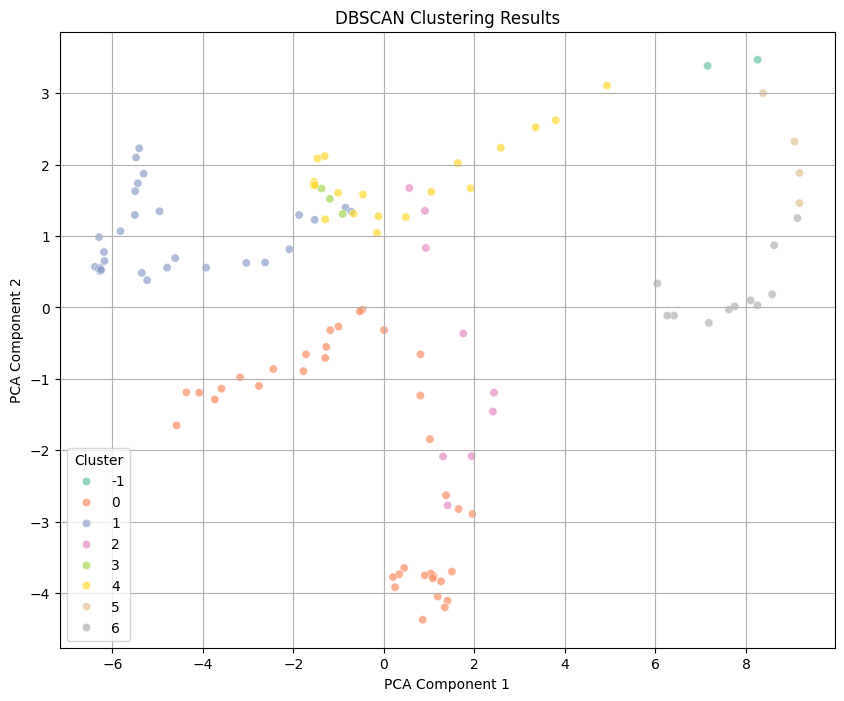

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot using seaborn
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='Set2', alpha=0.7)

# Add a title and labels
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()

# Show the plot
plt.show()


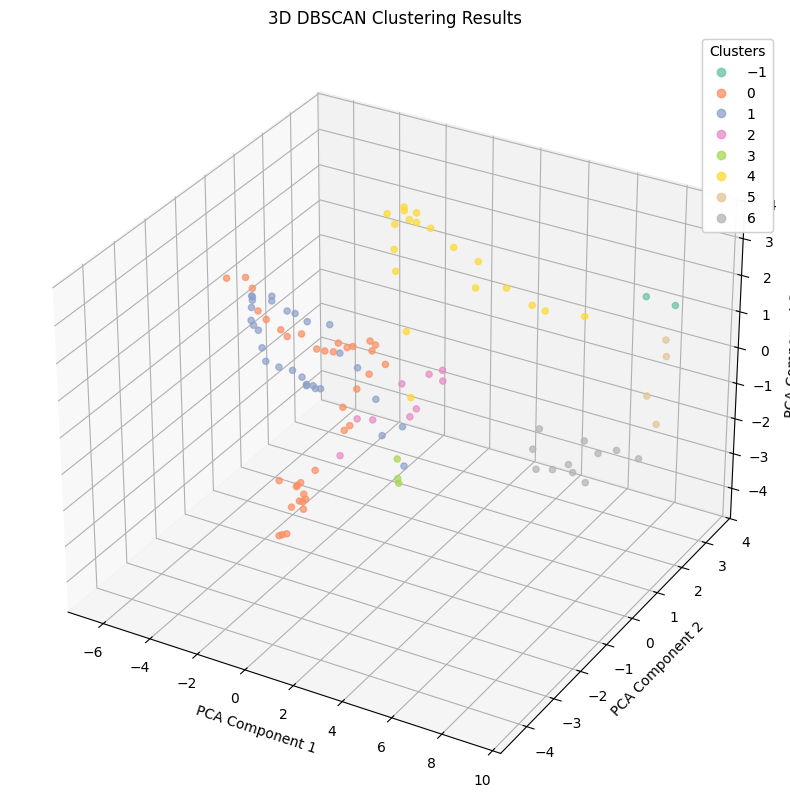

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Optionally, you can also reduce the data to 3D
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting points in 3D
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=combined_df['cluster'], cmap='Set2', alpha=0.7)

# Add labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D DBSCAN Clustering Results')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
